In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
# For connect to google sheet
import gspread
from oauth2client.service_account import ServiceAccountCredentials
from df2gspread import df2gspread as d2g
from pyhive import hive
import requests
import json
import random


# Recursive sleep generator

In [3]:
def sleep_generator(lower_limit=False, upper_limit=False):
    "Creates a random sleep delay from a uniform distribution"
    sleep(random.uniform(3, 3.6))
    return ""

In [4]:
def recursive_sleep(item, related_queries):
    "A recursive sleep function that grows larger over time if it doesn't receive data."
    # Setting some initial boundaries for the uniform sleep command 
    lower_bound = 61
    upper_bound = 90
    incremental_weight = 15
    
    while True:
        # Check to see if the dataframe is empty
        if related_queries.empty:
            sleep(random.uniform(lower_bound, upper_bound))
            # Re-build the payload
            pytrends.build_payload(kw_list=item, cat=0, timeframe='today 12-m', geo='', gprop='')
            related_queries = pytrends.interest_over_time()
            # Re-adjusting the lower/upper bound values
            lower_bound += incremental_weight
            upper_bound += incremental_weight
            # Penalising the weight for failing to secure us a request
            incremental_weight = incremental_weight * 1.75
            # Printing so we know we're waiting to make a request
            print('-----')
            print('Creating incremental sleep until we can start making requests again!')
            print(related_queries)
            print('-----')
        else:
            return related_queries

In [5]:
def recursive_sleep_429(item, related_queries, lower_bound=False, upper_bound=False):
    # Setting some initial boundaries for the uniform sleep command 
    lower_bound = 61
    upper_bound = 90
    incremental_weight = 15
    
    while True:
        try:
            sleep(random.uniform(lower_bound, upper_bound))
            # Re-build the payload
            pytrends.build_payload(kw_list=item, cat=0, timeframe='today 12-m', geo='', gprop='')
            related_queries = pytrends.interest_over_time()
            # Re-adjusting the lower/upper bound values
            lower_bound += incremental_weight
            upper_bound += incremental_weight
            # Penalising the weight for failing to secure us a request
            incremental_weight = incremental_weight * 2
            # Printing so we know we're waiting to make a request
            print('-----')
            print('Creating incremental sleep until we can start making requests again!')
            print('-----')
            return related_queries
        except ResponseError as e:
            recursive_sleep_429(item, 
                                related_queries, 
                                lower_bound=lower_bound, 
                                upper_bound=upper_bound)

In [6]:
def data_manipulation(related_queries):
    # Drop the isPartial Column
    related_queries.drop(columns=['isPartial'], inplace=True)
#     # Extract The Number of Rows
# #     number_of_rows = related_queries.shape[0]
# #     # Extract The Query Name
#     query_name = related_queries.columns[0]
# #     # Extract The Query Column
# #     query_column = [query_name] * number_of_rows
# #     related_queries.insert(0, 'Query', query_column)
# #     # Rename The Query Column
#     related_queries.rename(columns={query_name:'Trend Value'}, inplace=True)
    return related_queries

In [57]:
def rename_columns(stacked_df):
    renamed_column_df = stacked_df.rename(columns={"level_1":"Trade_name",0:"Trend_value"})
    return(renamed_column_df)

# Configuring Gsheets connection 

In [7]:
# Configure the connection 
scope = ['https://spreadsheets.google.com/feeds','https://www.googleapis.com/auth/drive','https://www.googleapis.com/auth/spreadsheets']

# Give the path to the Service Account Credential json file 
credentials = ServiceAccountCredentials.from_json_keyfile_name('xxx.json',scope) # enter your enter your json credentials here


# Authorise your Notebook
gc = gspread.authorize(credentials)

# The spread sheet ID, which can be taken from the link to the sheet
spreadsheet_key = 'xxxx' # Enter your spreadsheet id here

# Function for pushing the data into Google sheet

**This is a very good blog to follow instructions** -

https://towardsdatascience.com/how-to-integrate-google-sheets-and-jupyter-notebooks-c469309aacea

In [9]:
def gsheets(dataset,sheet_name):# Set the sheet name you want to upload data to and the start cell where the upload data begins 
    wks_name = sheet_name
    data = dataset
    cell_of_start_df = 'A1'
    # upload the dataframe of the clients we want to delete
    d2g.upload(data,
               spreadsheet_key,
               wks_name,
               credentials=credentials,
               col_names=True,
               row_names=True,
               start_cell = cell_of_start_df,
               clean=False)
    print ('The {} sheet is updated successfully'.format(sheet_name))

## Enter your input data set

In [10]:
# data = pd.read_excel('<dataset>.xlsx',sheet_name='Sheet2') 

## Extract queries from the input data

In [2]:
# queries = <subset-of-data>

# Google trends analysis

In [19]:
import pytrends
from pytrends.request import TrendReq
import time
import datetime
from datetime import datetime, date, time
from time import sleep
import time as t
from datetime import datetime
from pytrends.exceptions import ResponseError


In [20]:
pytrend = TrendReq()

# Trend over time

In [24]:
keywords

0                            Plumbers
1                    Roofing Services
2                            Builders
3                     Garage Services
4                          Solicitors
                    ...              
195    Business & Industrial Removals
196                    Beds & Bedding
197    Packaging Materials & Services
198                       Bricklayers
199              Pallet & Case Makers
Name: Classification, Length: 200, dtype: object

In [27]:
frames = []
for k in keywords:
    pytrend.build_payload(kw_list=[k], timeframe='today 12-m', geo = 'GB', cat=0)
    interest_over_time_df = pytrend.interest_over_time()
    sleep_generator()
    frames.append(interest_over_time_df)
    
result = pd.concat(frames,axis=1,ignore_index=False).drop(columns=['isPartial'])
result
    

,Plumbers,Roofing Services,Builders,Garage Services,Solicitors,Skip Hire,Funeral Directors,Painters & Decorators,Double Glazing Installers,Accountants,...,Civil Engineers,Roofing Materials,Steel Stockholders,Music Teachers,Quarries,Web Design & Development,Computer Repairs,Fencing Materials,T-Shirt Printers,Bricklayers
date,,,,,,,,,,,,,,,,,,,,,
2019-04-21,77,58,51,77,86,51,56,73,0,86,...,49,44,32,62,50,100,72,64,51,64
2019-04-28,75,50,50,61,93,41,51,35,0,79,...,63,49,15,44,69,0,57,25,0,65
2019-05-05,70,72,49,66,85,36,60,36,0,78,...,32,25,62,68,49,0,47,100,0,79
2019-05-12,73,47,48,75,91,45,53,36,0,82,...,90,38,32,100,84,0,66,25,51,77
2019-05-19,79,52,51,63,90,48,54,36,0,84,...,40,37,40,69,53,0,76,50,51,53
2019-05-26,72,30,47,53,81,42,53,35,32,69,...,71,43,39,74,39,0,72,49,49,68
2019-06-02,68,44,48,61,90,35,52,34,0,79,...,76,47,52,58,52,0,67,24,95,44
2019-06-09,75,39,47,77,86,36,51,86,0,89,...,38,30,30,65,65,0,72,48,0,41
2019-06-16,79,62,49,69,94,40,54,72,0,75,...,64,94,48,76,80,0,73,25,0,63


In [ ]:
# # for example, lets enter some keywords here, select a time range and country
# interest_over_time_df = pd.DataFrame()
# failed_requests = []
# for k in keywords:
#     item = k
#     try:
#         pytrend.build_payload(kw_list=item, timeframe='today 12-m', geo = 'GB', cat=0)
#         iot = pytrend.interest_over_time()
#         related_queries = recursive_sleep(item,related_queries)
#         sleep_generator()
#     except ResponseError as e:
#         # Printing the rate limit error
#         print(e)
# #         # Printing te 
# #         related_queries = recursive_sleep_429(item, related_queries)        
#         interest_over_time_df.append(iot)    
    

In [50]:
trades_stacked = result.stack().reset_index()

In [52]:
trades_stacked

,date,level_1,0
0,2019-04-21,Plumbers,77
1,2019-04-21,Roofing Services,58
2,2019-04-21,Builders,51
3,2019-04-21,Garage Services,77
4,2019-04-21,Solicitors,86
...,...,...,...
7119,2020-04-12,Web Design & Development,91
7120,2020-04-12,Computer Repairs,35
7121,2020-04-12,Fencing Materials,58
7122,2020-04-12,T-Shirt Printers,0


In [58]:
trends_stacked = rename_columns(trades_stacked)

In [ ]:
# interest_over_time_df = pd.DataFrame()

# failed_requests = []

# for k in keywords:
#     item = k
#     try:
#         pytrends.build_payload(kw_list=item, cat=0, timeframe='today 12-m', geo='GB', gprop='')
#         # Adding In A Recursive Function To Check Whether Google Has Stopped Sending Us Data
#         related_queries = pytrends.interest_over_time()
#         related_queries = recursive_sleep(item, related_queries)
#         # Performing data manipulation
# #         clean_df = data_manipulation(related_queries)
#         # Inserting a random sleep delay
# #         sleep_generator()
#     except ResponseError as e:
#         # Printing the rate limit error
#         print(e)
#         # Printing te 
#         related_queries = recursive_sleep_429(item, related_queries)
#         # Performing data manipuation
#         clean_df = data_manipulation(related_queries)
#     print(f"{index} out of {df.shape[0]}") 
#     # Save the values
#     interest_over_time_df = pd.concat([interest_over_time_df, clean_df])

# Let's draw


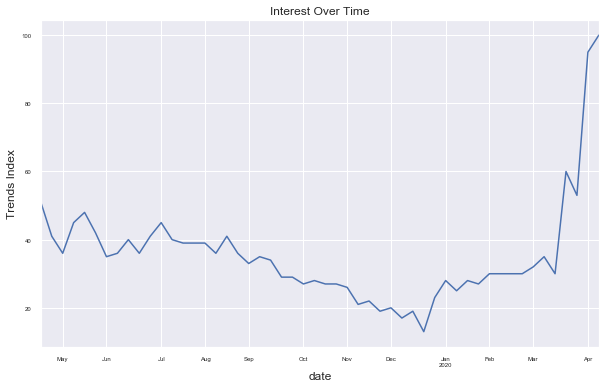

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
ax = result['Skip Hire'].plot(kind='line',figsize=(10,6), title = "Interest Over Time")
ax.set_xlabel('date')
ax.set_ylabel('Trends Index')
ax.tick_params(axis='both', which='major', labelsize=6)


# Pushing data into gsheets

In [59]:
gsheets(trends_stacked,'trends_stacked_137')

The trends_stacked_137 sheet is updated successfully


# Related queries

In [3]:
def related_queries_sleep(item, related_queries, lower_bound=False, upper_bound=False):
    "A recursive sleep function that grows larger over time if it doesn't receive data."
    # Setting some initial boundaries for the uniform sleep command 
    lower_bound = 30
    upper_bound = 30
    incremental_weight = 15
    
    while True:
        try:
            sleep(random.uniform(lower_bound, upper_bound))
            pytrends.build_payload(kw_list=item, timeframe='today 3-m')
            related_queries = pytrends.related_queries()
            return related_queries
        
        except ResponseError as e:
            sleep(random.uniform(lower_bound, upper_bound))
            # Re-adjusting the lower/upper bound values
            lower_bound += incremental_weight
            upper_bound += incremental_weight
            # Penalising the weight for failing to secure us a request
            incremental_weight = incremental_weight * 1.75
            related_queries_sleep(item, 
                                related_queries, 
                                lower_bound=lower_bound, 
                                upper_bound=upper_bound)

In [152]:
keywords

0                            Plumbers
1                    Roofing Services
2                            Builders
3                     Garage Services
4                          Solicitors
                    ...              
195    Business & Industrial Removals
196                    Beds & Bedding
197    Packaging Materials & Services
198                       Bricklayers
199              Pallet & Case Makers
Name: Classification, Length: 200, dtype: object

In [4]:
# test = ['skip hire','accountant','dentist']
# results = []

# for row in test:
#     item = row
#     try:
#         pytrends.build_payload(kw_list=item)
#         related_queries = pytrends.related_queries()
#         # Save the results to a master_list
#         results.append(related_queries)
#         print(related_queries)
#     except ResponseError as e:
#         print(e)
#         related_queries = related_queries_sleep(item, related_queries)
#         # Save the results to a master_list
#         results.append(related_queries)

In [192]:
test = ['skip hire','accountant','dentist']
rq_result = []
for k in test:
    pytrend.build_payload(kw_list=[k], geo = 'GB', cat=0)
    related_queries = pytrend.related_queries()
    sleep_generator()
    rq_result.append(related_queries)
    
# # result = pd.concat(frames,axis=1,ignore_index=False).drop(columns=['isPartial'])
    

In [193]:
master_df = pd.DataFrame()

for item in rq_result:
    
    # Extract the key name
    key = list(item.keys())[0]
    
    # Extract the top values data
    top_values = item[key]['top']
    top_values.rename(columns={'query':'Top_Query', 'value':'Value'}, inplace=True)
    
    # Extract the rising keyword values
    rising_values = item[key]['rising']
    rising_values.rename(columns={'query':'Rising_Query', 'value':'Value'}, inplace=True)
    
    # Creating an equal length of keys for that column
    key = [key] * len(top_values)
    top_values.insert(0,0, key, allow_duplicates=True)
    top_values.rename(columns={0:'Original_Query'}, inplace=True)
    
    data = pd.concat([top_values, rising_values], axis=1)
    
    master_df = master_df.append(data)

In [194]:
master_df

,Original_Query,Top_Query,Value,Rising_Query,Value
0,skip hire,skip hire prices,100,skip hire prices near me,46850
1,skip hire,skips,83,mini skip hire near me,17750
2,skip hire,skip hire near me,54,skip hire near me,8750
3,skip hire,cheap skip hire,47,cheap skip hire near me,2200
4,skip hire,skip hire cost,45,colson skip hire,650
...,...,...,...,...,...
20,dentist,emergency dentist near me,5,the singing dentist,650
21,dentist,dentist salary,5,bupa dentist,550
22,dentist,toothache,4,my dentist morley,400
23,dentist,dentist charges,4,elm park dentist,350
